# August SFARI Update

Over the past decade, a number of studies have revealed associations between microbiome diversity and/or composition and ASD phenotypes. However, as is the case with a majority of microbiome and other omics analyses across diseases, there is little agreement among studies due to inherent biological and computational challenges associated with acquiring, processing and interpreting such data.

To determine whether the existing studies could be used to objectively inform the design of the next generation of microbiome studies in ASD, we set out to re-analyze the datasets using a standardized and data-driven probabilistic modeling approach a.k.a. a Bayesian approach. We chose this strategy to maximize the amount of information that could be extracted from each individual study and to minimize biases introduced by traditional model-driven statistical methods a.k.a. frequentist methods. The resulting analytical pipeline can be universally applied to different types of omics datasets to help determine information flow across biological organization levels.

Here we present initial results from the integrated analysis of nine 16S amplicon datasets, four shotgun datasets and four RNAseq datasets using a customized age- and sex-matched differential abundance approach—in the ASD cohorts studies, age and sex are the top parameters associated with microbiome and ASD phenotype, respectively.

The most salient result of our analysis is the high level of convergence among studies; the case-control differential abundance models were able to detect strong ASD-specific differences in microbial taxa abundances and human expression data (pvalue<0.0005) while explaining the majority of the variation across these three datasets (16S $R^2 = 0.58 \pm 0.43$, Shotgun metagenomics $R^2 = 0.75 \pm 0.399$, RNAseq $R^2 = 0.99 \pm 0.049$). This Bayesian approach provides a solid framework for the design and analysis of future studies aiming to a better understanding of a potential causal role of the microbiome in ASD. 

In this notebook we first lay out the rationale for the differential abundance approach we applied to the analysis of the above datasets. Next we show how we obtained metabolic pathway information from the top ASD associated microbes and transcripts, We then describe how we constructed a comprehensive metabolic map that integrates the different omic levels analyzed. Finally, we provide an independent validation of our differential abundance amplicon analysis using data from an interventional fecal matter transplant study. A detailed description of the data processing and the bioinformatic pipeline construction can be found in the appendix.

Technical note: all analyses described in this notebook have been done using preprocessed datasets and can thus be executed in real time from the code blocks if needed. Note that we have designed the notebook with readability in mind and thus it is not necessary to run the  code blocks to follow the narrative and/or see the figures. Please contact Gaspar (gtaroncher-consultant@simonsfoundation.org) and Jamie (jmorton@flatironinstitute.org) if you have any questions.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#August-SFARI-Update" data-toc-modified-id="August-SFARI-Update-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>August SFARI Update</a></span></li><li><span><a href="#Differential-Ranking-Analysis" data-toc-modified-id="Differential-Ranking-Analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Differential Ranking Analysis</a></span></li><li><span><a href="#Comparative-Genomics-Analysis" data-toc-modified-id="Comparative-Genomics-Analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Comparative Genomics Analysis</a></span><ul class="toc-item"><li><span><a href="#16S-amplicon-genome-analysis" data-toc-modified-id="16S-amplicon-genome-analysis-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>16S amplicon genome analysis</a></span></li><li><span><a href="#Whole-genome-shotgun-sequencing-genome-analysis" data-toc-modified-id="Whole-genome-shotgun-sequencing-genome-analysis-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Whole genome shotgun sequencing genome analysis</a></span></li><li><span><a href="#Human-genome-RNAseq-pathway-aggregation" data-toc-modified-id="Human-genome-RNAseq-pathway-aggregation-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Human genome RNAseq pathway aggregation</a></span></li><li><span><a href="#Overlap-across-omics-layers" data-toc-modified-id="Overlap-across-omics-layers-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Overlap across omics layers</a></span></li></ul></li><li><span><a href="#Metabolic-networking" data-toc-modified-id="Metabolic-networking-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Metabolic networking</a></span></li><li><span><a href="#Validation-with-Fecal-matter-transplant-trial" data-toc-modified-id="Validation-with-Fecal-matter-transplant-trial-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Validation with Fecal matter transplant trial</a></span></li><li><span><a href="#Closing-comments" data-toc-modified-id="Closing-comments-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Closing comments</a></span><ul class="toc-item"><li><span><a href="#Future-potential-opportunities-for-investigation" data-toc-modified-id="Future-potential-opportunities-for-investigation-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Future potential opportunities for investigation</a></span><ul class="toc-item"><li><span><a href="#Longitudinal,-interventional-trials" data-toc-modified-id="Longitudinal,-interventional-trials-6.1.1"><span class="toc-item-num">6.1.1&nbsp;&nbsp;</span>Longitudinal, interventional trials</a></span></li><li><span><a href="#Dense-longitudinal-analysis" data-toc-modified-id="Dense-longitudinal-analysis-6.1.2"><span class="toc-item-num">6.1.2&nbsp;&nbsp;</span>Dense longitudinal analysis</a></span></li><li><span><a href="#Integrated-multi-omics-analysis" data-toc-modified-id="Integrated-multi-omics-analysis-6.1.3"><span class="toc-item-num">6.1.3&nbsp;&nbsp;</span>Integrated multi-omics analysis</a></span></li><li><span><a href="#Host-microbe-diet-interactions" data-toc-modified-id="Host-microbe-diet-interactions-6.1.4"><span class="toc-item-num">6.1.4&nbsp;&nbsp;</span>Host-microbe-diet interactions</a></span></li></ul></li></ul></li><li><span><a href="#Appendix" data-toc-modified-id="Appendix-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Appendix</a></span><ul class="toc-item"><li><span><a href="#Statistical-overview" data-toc-modified-id="Statistical-overview-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Statistical overview</a></span><ul class="toc-item"><li><span><a href="#Differential-Ranking" data-toc-modified-id="Differential-Ranking-7.1.1"><span class="toc-item-num">7.1.1&nbsp;&nbsp;</span>Differential Ranking</a></span></li><li><span><a href="#A-Brief-Primer-to-Bayesian-Inference" data-toc-modified-id="A-Brief-Primer-to-Bayesian-Inference-7.1.2"><span class="toc-item-num">7.1.2&nbsp;&nbsp;</span>A Brief Primer to Bayesian Inference</a></span></li><li><span><a href="#Bayesian-Hypothesis-testing" data-toc-modified-id="Bayesian-Hypothesis-testing-7.1.3"><span class="toc-item-num">7.1.3&nbsp;&nbsp;</span>Bayesian Hypothesis testing</a></span></li><li><span><a href="#Bayesian-Effect-Size-Calculations" data-toc-modified-id="Bayesian-Effect-Size-Calculations-7.1.4"><span class="toc-item-num">7.1.4&nbsp;&nbsp;</span>Bayesian Effect Size Calculations</a></span></li></ul></li><li><span><a href="#Datasets-analyzed" data-toc-modified-id="Datasets-analyzed-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Datasets analyzed</a></span><ul class="toc-item"><li><span><a href="#16S-amplicon-datasets" data-toc-modified-id="16S-amplicon-datasets-7.2.1"><span class="toc-item-num">7.2.1&nbsp;&nbsp;</span>16S amplicon datasets</a></span></li><li><span><a href="#Shotgun-metagenomic-datasets" data-toc-modified-id="Shotgun-metagenomic-datasets-7.2.2"><span class="toc-item-num">7.2.2&nbsp;&nbsp;</span>Shotgun metagenomic datasets</a></span></li><li><span><a href="#RNAseq-datasets" data-toc-modified-id="RNAseq-datasets-7.2.3"><span class="toc-item-num">7.2.3&nbsp;&nbsp;</span>RNAseq datasets</a></span></li></ul></li><li><span><a href="#Bioinformatics-Overview" data-toc-modified-id="Bioinformatics-Overview-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Bioinformatics Overview</a></span><ul class="toc-item"><li><span><a href="#16S-amplicon-datasets" data-toc-modified-id="16S-amplicon-datasets-7.3.1"><span class="toc-item-num">7.3.1&nbsp;&nbsp;</span>16S amplicon datasets</a></span></li><li><span><a href="#Shotgun-metagenomics" data-toc-modified-id="Shotgun-metagenomics-7.3.2"><span class="toc-item-num">7.3.2&nbsp;&nbsp;</span>Shotgun metagenomics</a></span></li><li><span><a href="#RNA-sequencing-data" data-toc-modified-id="RNA-sequencing-data-7.3.3"><span class="toc-item-num">7.3.3&nbsp;&nbsp;</span>RNA sequencing data</a></span></li></ul></li></ul></li></ul></div>

In [1]:
# This block is just for importing the necessary libraries.  
import os
from collections import defaultdict
# Numerical libraries
import pandas as pd
import numpy as np
import biom
import arviz as az
from scipy.spatial.distance import euclidean
from gneiss.balances import sparse_balance_basis
# Plotting libraries
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.patches as mpatches
import seaborn as sns
from matplotlib_venn import venn2, venn3
# custom utility and plotting functions
from util import (extract_differentials, select_features, 
                  get_genomic_data, collapse_transcripts, 
                  aggregate_pathways,
                  ranking, btest, log_pvalue, read_kegg_dict,
                  ilr_transform_differentials,
                  rename_clades, create_projection,
                  match_all_differentials)
from plot import (rankplot, networkplot, vectorplot)
import random

# directory paths
amp_directory = '../sfari/data/sra/Combined'
wgs_directory = '../sfari/data/sra_shotgun/Combined'
rna_directory = '../sfari/data/recount3'
kang_directory = '../sfari/data/sra/Kang2017'
sepp_directory = '../sfari/data/sra/Kang2017/deblur/sepp'
results_dir = '../results'
kegg_dir = f'{results_dir}/kegg'
hsa_dir = f'{results_dir}/hsa_kegg'
np.random.seed(0)
random.seed(0)
%matplotlib inline

# Differential Ranking Analysis

Differential abundance analysis seeks to detect differentially abundant omic features (species, OTUs, metabolites, cytokines,...) between two conditions. While such an analysis can improve our understanding of the aetiology of a disease and potentially lead to preventive or therapeutic strategies, the compositional nature of omics data, and in particular microbiome data, poses unique challenges for performing traditional differential abundance analysis.

First, and because no absolute microbial abundances can be determined at the time of sampling (concentrations, cells/gram, ...), it is not possible to determine absolute changes in microbial abundances. Instead, one is limited to determine relative abundances and then use log-fold change up to a constant bias to ‘sort’ microbes, or any other omics feature characterized by the same sampling limitations to show relative degrees of ‘perturbation’ across all features present in an omic dataset (see [this paper](https://www.nature.com/articles/s41467-019-10656-5) on a full explanation).  

The second major challenge is dealing with batch effects. Due to differences in collection and processing protocols, different studies are no longer directly comparable. Adopting an approach that zeroes out such batch effects by making the differential analysis study-specific can help minimize any batch-related confounders in a combined analysis.

Due to these and other challenges, differential abundance analysis remains one of the more controversial approaches to analyzing microbiome datasets. 

Here, and in order to address these challenges by maximizing the amount of information we could extract from the datasets while minimizing any batch-related confounders, we designed a customized differential abundance tool that could leverage the experimental designs of each of the studies included in the analysis. Specifically, we incorporated age-sex matching into the statistical models to allow us to determine feature perturbation profiles within the context of each individual study followed by a combined analysis of the normalized perturbation profiles of different studies. The overall model had the following structure

$$
y_{i,j} \sim NegativeBinomial(\lambda_{i,j}, \alpha_j)\\
\log \lambda_{i,j} = \log N_i + C_{k(i), j} + \Delta_j \textrm{I}[i=ASD]
$$

Here $y_{i,j}$ denotes the microbial counts in sample $i$ and species $j$ and $\alpha_j$ represents the microbe specific over-dispersion term. The sequencing depth is represented by $N_i$. By incorporating $N_i$ into the model, the model is self-normalizing and doesn't need rarefaction.  $C_{k(i), j}$ represents the log proportion of microbe $j$ in the $k(i)$ control subject.  This is where the age-sex matching comes in; $k(i)$ denotes the pairing that sample i belongs to.
$\Delta_j$ represents microbe log-fold change difference between the control and ASD subject, the quantity that we are interested in.  For finishing touches, $\textrm{I}[i=ASD]$ a function that is 0 if sample i corresponds to the control subject and 1 is sample i corresponds to the ASD subject.

One advantage of using the above model is that if the batch effects are multiplicative (e.g., PCR amplification bias), they will cancel out and will not impact the calculation of $\Delta_j$. In addition, the above model structure provides a template for fitting a differential abundance model to different types of omics data.

The model was fitted using a Monte-Carlo Markov Chain (MCMC) approach. Because MCMC is a computationally very intensive method, we ran the model fittings shown here offline to make the notebook operational.

In [2]:
# load 16S, whole genome shotgun and RNAseq data
posterior_name = 'age_sex_matched_posterior'
amp_fname = f'{amp_directory}/{posterior_name}/amp_differentials-v3.nc'
wgs_fname = f'{wgs_directory}/{posterior_name}/ogus_differentials-v2.nc'
rna_fname = f'{rna_directory}/{posterior_name}/rna_differentials-v3.nc'
vir_fname = f'{wgs_directory}/{posterior_name}/viral_differentials-v2.nc'

amp_diffs = extract_differentials(amp_fname)
wgs_diffs = extract_differentials(wgs_fname)
rna_diffs = extract_differentials(rna_fname)
vir_diffs = extract_differentials(vir_fname)

# Compute statistical tests for each data layer
# Here, we will only focus on the top 10% of the features
amp_stats = ranking(amp_diffs, reference_percentile=90)
wgs_stats = ranking(wgs_diffs, reference_percentile=90)
rna_stats = ranking(rna_diffs, reference_percentile=90)
vir_stats = ranking(vir_diffs, reference_percentile=90)

One of the benefits of fitting these models in a Bayesian setting is that we were able to quantify the uncertainty surrounding the parameters of interest. This was crucial for us since we wanted to be able to quantify how well we could estimate the microbial log-changes between the control and ASD subjects. Doing so allowed us to compute Bayesian p values along with a full array of statistics. Here, we will focus on a one-sided T-test to identify the top 5% most differentially increased microbes. Specifically, we will use the following statistic

$$
t_j = \frac{\bar{\Delta_j} - \Delta_{90\%}}{s_j / M}
$$

We calculate this T-statistic using draws from the *posterior distribution* of $\Delta_j$, from which we can compute p-values. Here $\bar{\Delta_j}$ represents the average log-fold change for microbe $j$, $\Delta_{90\%}$ represents the expected log-fold for the $90\%$th most differentially increased microbe, $s_j$ represents the estimated standard deviation from $M$ posterior draws.  Computing this quantity will allow us to focus our attention to the top 5% most differentially increased microbes in ASD subjects.  And because we are in a Bayesian setting, we can easily compute these quantities by explicitly sampling from the *posterior distribution* of $\Delta_j$ (Please, refer to the Appendix for a detailed explanation of these concepts).

The reason why we should this approach rather than comparing against medians and averages as done in DESeq2 and Aldex2 is because these enforce extremely strong assumptions that typically do not hold in practice and yield extremely high false positive rates. By only investigating the top 5% most differentially abundant features, we adopt a much more conservative approach.

We applied this differential abundance approach to 16S amplicon data, metagenomic shotgun sequencing data and RNAseq data (we are in the process of applying the same approach to virome data and metabolome data as well). Plotted below are the log-fold change estimates across eight 16S amplicon datasets, four metagenomic datasets and four RNAseq datasets.

In [3]:
rna_stats['mean'].describe()

count    4.799200e+04
mean    -1.061254e-15
std      2.651392e+00
min     -8.643147e+00
25%     -2.358943e+00
50%     -6.207224e-01
75%      2.356998e+00
max      1.081475e+01
Name: mean, dtype: float64

In [4]:
wgs_stats['mean'].describe()

count    4.492000e+03
mean     1.138893e-16
std      3.385850e+00
min     -9.428093e+00
25%     -2.660206e+00
50%     -1.047085e+00
75%      2.039570e+00
max      1.191957e+01
Name: mean, dtype: float64

In [5]:
vir_stats['mean'].describe()

count    1.661000e+03
mean    -6.844482e-17
std      5.413521e+00
min     -8.236657e+00
25%     -6.289967e+00
50%     -2.727425e+00
75%      5.135904e+00
max      1.090039e+01
Name: mean, dtype: float64

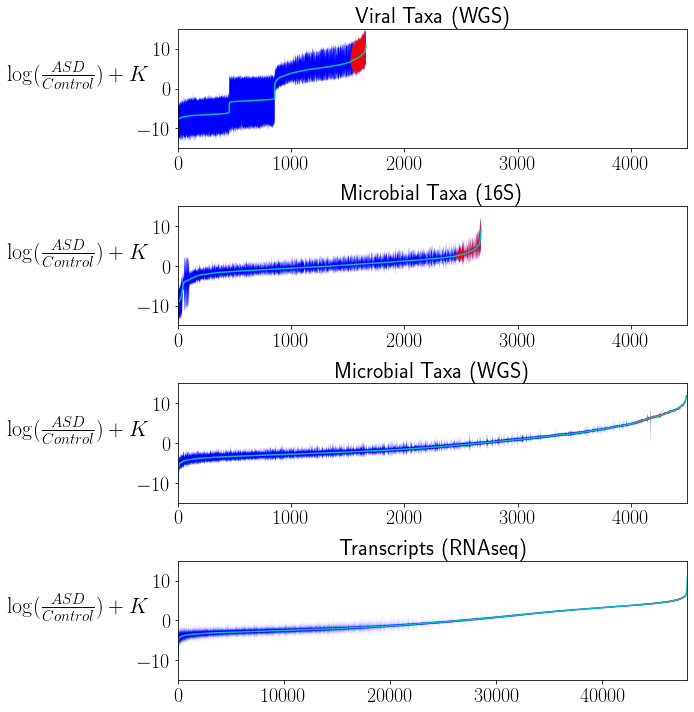

In [6]:
matplotlib.rcParams['text.usetex'] = True
# Plot the log-fold changes
#with plt.style.context('dark_background'):
fig, ax = plt.subplots(4, 1, figsize=(10, 10))
fs, ls = 22, 20
rankplot(vir_stats, ax[0])
ax[0].set_title('Viral Taxa (WGS)', fontsize=fs)
ax[0].set_ylim([-15, 15])
ax[0].set_xlim([0, 4500])
ax[0].set_ylabel(r'$\log(\frac{ASD}{Control})+K$', fontsize=fs, labelpad=60)
ax[0].tick_params(axis='x', labelsize=ls)
ax[0].tick_params(axis='y', labelsize=ls)

rankplot(amp_stats, ax[1])
ax[1].set_title('Microbial Taxa (16S)', fontsize=fs)
ax[1].set_ylim([-15, 15])
ax[1].set_xlim([0, 4500])
ax[1].set_ylabel(r'$\log(\frac{ASD}{Control})+K$', fontsize=fs, labelpad=60)
ax[1].tick_params(axis='x', labelsize=ls)
ax[1].tick_params(axis='y', labelsize=ls)

rankplot(wgs_stats, ax[2])
ax[2].set_title('Microbial Taxa (WGS)', fontsize=fs)
ax[2].set_ylim([-15, 15])
ax[2].set_xlim([0, 4500])
ax[2].set_ylabel(r'$\log(\frac{ASD}{Control})+K$', fontsize=fs, labelpad=60)
ax[2].tick_params(axis='x', labelsize=ls)
ax[2].tick_params(axis='y', labelsize=ls)

rankplot(rna_stats, ax[3])
ax[3].set_ylim([-15, 15])
ax[3].set_title('Transcripts (RNAseq)', fontsize=fs)
ax[3].set_xlim([0, 48000])
ax[3].set_ylabel(r'$\log(\frac{ASD}{Control})+K$', fontsize=fs, labelpad=60)
ax[3].tick_params(axis='x', labelsize=ls)
ax[3].tick_params(axis='y', labelsize=ls)

plt.tight_layout()

There are two parts to each figure. We have plotted the 95% credible intervals for each microbe’s log-fold change estimate. Due to the unknown bias denoted by $K$, we cannot exactly identify where 0 is, motivating our ranking strategy highlighted above. The red portion of the curve denotes the microbes that are amongst the top 5% microbes differentially increased in the ASD subjects.


You can see that there is **much** large magnitude of change in the microbiome datasets (roughly $10^6$) compared to the RNAseq datasets (roughly $10^3$). We can perform a Bayesian hypothesis test to put a hard number on the differences in this effect size.

In [7]:
# Perform Bayesian hypothesis test
from q2_matchmaker._stats import spherical_test
w_vir, vir_r, vir_z = spherical_test(vir_diffs.values.T, p=1)
w_amp, amp_r, amp_z = spherical_test(amp_diffs.values.T, p=1)
w_wgs, wgs_r, wgs_z = spherical_test(wgs_diffs.values.T, p=1)
w_rna, rna_r, rna_z = spherical_test(rna_diffs.values.T, p=1)

vir_e = vir_z / vir_r
amp_e = amp_z / amp_r
wgs_e = wgs_z / wgs_r
rna_e = rna_z / rna_r

print(f'[Viral] ASD diff detected {not w_vir}, '
      f'Effect size {vir_e}')
print(f'[16S] ASD diff detected {not w_amp}, '
      f'Effect size {amp_e}')
print(f'[WGS] ASD diff detected {not w_wgs}, '
      f'Effect size {wgs_e}')
print(f'[RNA] ASD diff detected {not w_rna}, '
      f'Effect size {rna_e}')

[Viral] ASD diff detected True, Effect size 3.9496105969138102
[16S] ASD diff detected True, Effect size 4.091221411478975
[WGS] ASD diff detected True, Effect size 13.410781101887805
[RNA] ASD diff detected True, Effect size 13.776415854450839


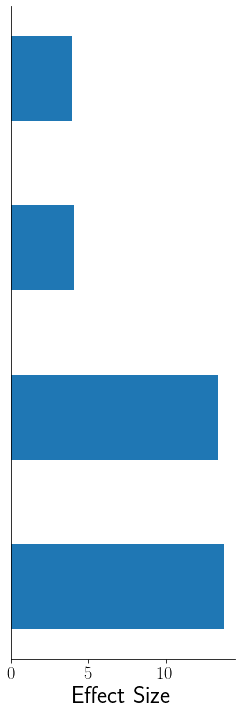

In [8]:
fig, ax = plt.subplots(figsize=(4, 12))
ax.barh([0, 1, 2, 3], [vir_e, amp_e, wgs_e, rna_e][::-1], height=0.5)
ax.set_yticks([])
ax.set_xlabel('Effect Size', fontsize=24)
ax.tick_params(axis='x', labelsize=18)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

What this test is doing is testing if zero is within the detected a credible intervals.
If zero is outside of the posterior distribution, then we can say with high confidence that
there is a globally significant difference.  We can also assign an effect size that is proportional to how close zero is to the posterior distribution.  See the appendix for more information on this calculation.

Earlier in the notebook, we also shared some $R^2$ values for the models.  The case-control differential abundance models are regression models, meaning that  given the match ids and the diagnosis information, our differential abundance models can predict the microbiome abundances and human expression levels.  Because of this, we can reuse some of the standard statistical metrics such as $R^2$.  In this case $R^2$ will have the same interpretation that is commonly used for interpreting PCoA plots, high $R^2$ denote the variation in the data that is explained by the model.  In our datasets, we have observed the following $R^2$ values : 16S $R^2 = 0.58 \pm 0.43$, Shotgun metagenomics $R^2 = 0.75 \pm 0.399$, RNAseq $R^2 = 0.99 \pm 0.049$.  To give a baseline of this accuracy, the state of the art studies such as [Gevers et al](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4059512/) can explain less than 10% of the microbial variability with Unifrac. Our observations suggests that our models were able to very accurately model the variability within these omics datasets with accuracy that is virtually unheard of in standard beta-diversity and differential abundance analyses.  

In the next section, we will pull out the microbes and transcripts highlighted in red and identify the metabolic genes that uniquely identify them. 

# Comparative Genomics Analysis

To investigate the ASD associated microbes in more detail, we will pull out these microbes and perform a heuristical comparative genomics analysis. Specifically, we will pull out the genes from these microbes, focus on the genes that are identified in the KEGG database and perform a Binomial test to identify which genes uniquely identify the ASD associated microbes.

## 16S amplicon genome analysis

We will first focus on the 16S analysis.  We will cross-reference the [deblurred microbes](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5340863/) against the [Picrust database](https://www.nature.com/articles/s41587-020-0548-6) to identify likely genes that belong to these microbes.  The Binomial test will then be applied to these microbe by gene tables to see what genes are more likely to be observed in the ASD associated microbes than other microbes.

In [9]:
# Perform binomial test on 16S data to determine uniquely identifying genes
amp_con, amp_asd = select_features(amp_stats, alpha=0.1)
ko_amp = pd.read_table(f'{amp_directory}/picrust2_out_pipeline/KO_predicted.tsv', 
                       index_col=0)
kegg_con_amp = ko_amp.align(amp_con, axis=0, join='inner')[0]
kegg_asd_amp = ko_amp.align(amp_asd, axis=0, join='inner')[0]
# apply binomial test.  Use BH correction to get per-gene pvalues
kegg_con_amp, kegg_asd_amp = btest(kegg_con_amp, kegg_asd_amp)
kegg_asd_amp = log_pvalue(kegg_asd_amp, alpha=0.1)
sig_amp = aggregate_pathways(
    pathway_name_file=f'{kegg_dir}/pathway_name.txt',
    pathway_to_ko_file=f'{kegg_dir}/pathway-to-ko.txt',
    features=kegg_asd_amp
)

Once we have identified the uniquely identifying genes, we can see what pathways these genes belong.

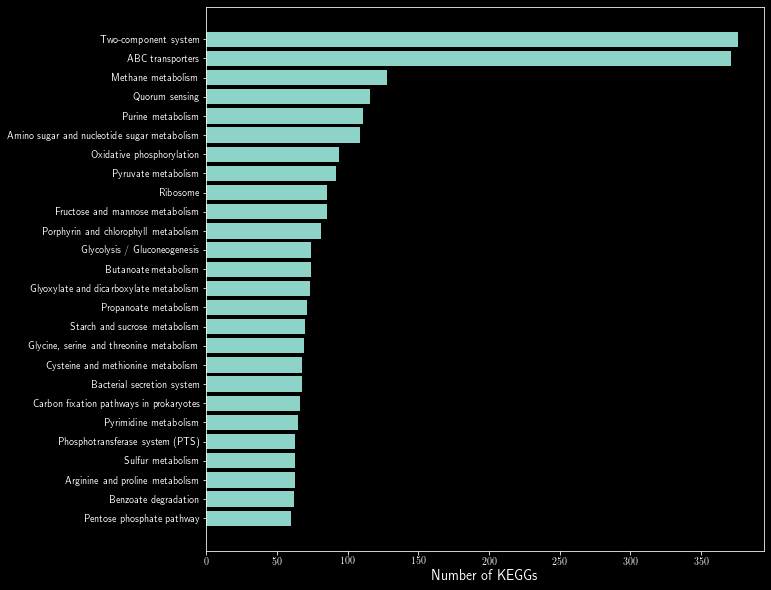

In [10]:
# Visualize KEGG counts for 16S data
with plt.style.context('dark_background'):
    fig, ax = plt.subplots(figsize=(10, 10))
    pwy_counts = sig_amp['Name'].value_counts().sort_values(ascending=True)
    # only focus on highly representive pathways
    pwy_counts = pwy_counts.loc[pwy_counts > 50] 
    ax.barh(pwy_counts.index, pwy_counts.values)
    ax.set_xlabel('Number of KEGGs', fontsize=14)

## Whole genome shotgun sequencing genome analysis

We can do a similar approach with the shotgun metagenomis data.  Using the [Woltka annotations](https://github.com/qiyunzhu/woltka) generated from the shotgun data, we can link microbial taxa to their metabolic genes. The major difference from the amplicon approach is that we will only count genes that are observed in the shotgun metagenomics data.

In [11]:
# Perform binomial test on shotgun metagenomics data
# Place hard threshold to select top ASD associated microbes
# Obtain presence-absence tables of microbes and their 
# corresponding KEGG genes in the shotgun data
wgs_con, wgs_asd = select_features(wgs_stats, alpha=0.1)
ko_ogu = get_genomic_data(f'{wgs_directory}/table_func.biom')
kegg_con_wgs = ko_ogu.align(wgs_con, axis=0, join='inner')[0]
kegg_asd_wgs = ko_ogu.align(wgs_asd, axis=0, join='inner')[0]

kegg_con_wgs, kegg_asd_wgs = btest(kegg_con_wgs, kegg_asd_wgs)
kegg_asd_wgs = log_pvalue(kegg_asd_wgs, alpha=0.1)
# apply binomial test.  Use BH correction to get per-gene pvalues
sig_wgs = aggregate_pathways(
    pathway_name_file=f'{kegg_dir}/pathway_name.txt',
    pathway_to_ko_file=f'{kegg_dir}/pathway-to-ko.txt',
    features=kegg_asd_wgs)

Similarly, we can see that many of the pathways that were picked up in the amplicon analysis are also observed in the shotgun metagenomics data.

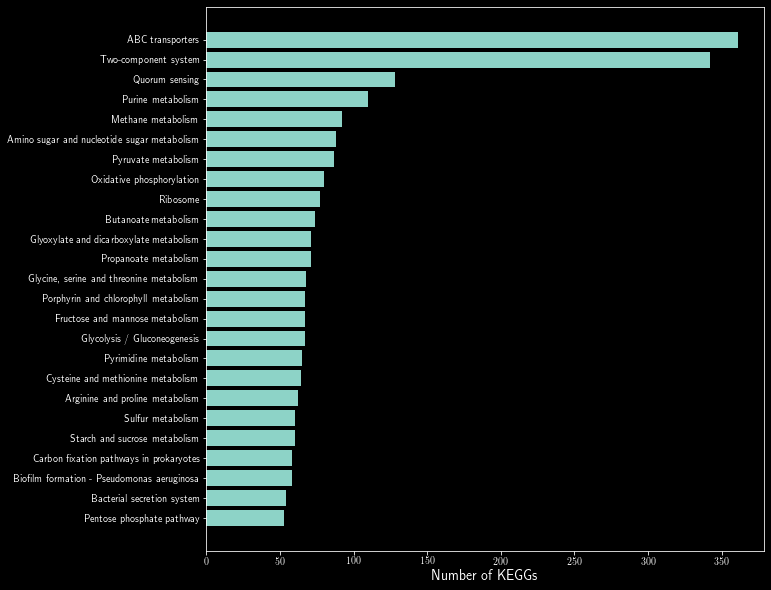

In [12]:
# Visualize KEGG counts for shotgun metagenomics data
with plt.style.context('dark_background'):
    fig, ax = plt.subplots(figsize=(10, 10))
    pwy_counts = sig_wgs['Name']
    pwy_counts = pwy_counts.value_counts()
    pwy_counts = pwy_counts.sort_values(ascending=True)
    # only focus on highly representive pathways
    pwy_counts = pwy_counts.loc[pwy_counts > 50] 
    ax.barh(pwy_counts.index, pwy_counts.values)
    ax.set_xlabel('Number of KEGGs', fontsize=14)

## Human genome RNAseq pathway aggregation

Mapping RNAseq data back to pathways is a bit more straightforward, it just requires finding a database that can map transcript ids to KEGG annotations.

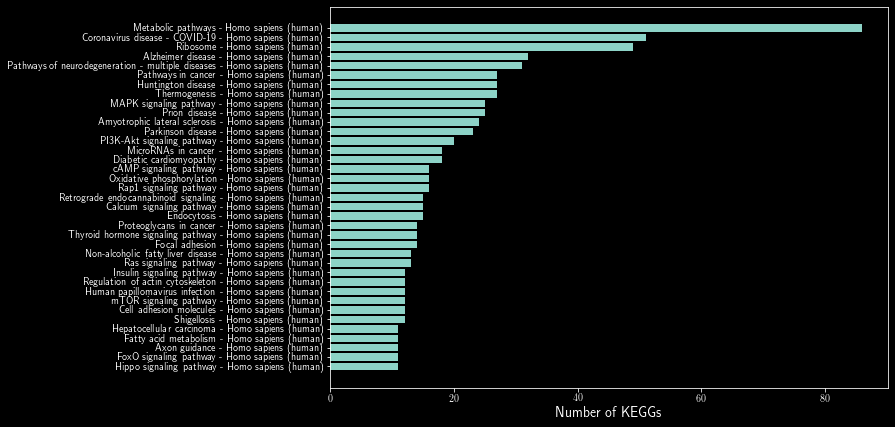

In [13]:
# Visualize KEGG counts for RNAseq data 
rna_con, rna_asd = select_features(rna_stats)
fname = f'{rna_directory}/ensembl2kegg.txt'
ensembl2ko = pd.read_table(fname, index_col=0)
ensembl2ko = ensembl2ko.set_index('gene_stable_id')
rna_asd = collapse_transcripts(rna_asd)
kegg_asd_rna = pd.merge(ensembl2ko, rna_asd, 
                        left_index=True, right_index=True)
kegg_asd_rna = kegg_asd_rna[['KO', 'pvalue']]
kegg_asd_rna = kegg_asd_rna.groupby('KO').mean()
kegg_asd_rna = log_pvalue(kegg_asd_rna, alpha=0.1)
split_func = lambda x: x.split(':')[-1]
kegg_asd_rna['KEGG'] = kegg_asd_rna['KEGG'].apply(split_func)

sig_rna = aggregate_pathways(
    pathway_name_file=f'{hsa_dir}/pathway_name.txt',
    pathway_to_ko_file=f'{hsa_dir}/ko-to-pathway.txt',
    features=kegg_asd_rna,
    columns=['HSA', 'Pathway']
)
with plt.style.context('dark_background'):
    fig, ax = plt.subplots(figsize=(10, 7))
    pwy_counts = sig_rna['Name'].value_counts()
    pwy_counts = pwy_counts.loc[pwy_counts > 10] 
    pwy_counts = pwy_counts.sort_values(ascending=True)
    ax.barh(pwy_counts.index, pwy_counts.values)
    ax.set_xlabel('Number of KEGGs', fontsize=14)

The number of hits was substantially lower when compared with the 16S amplicon and shotgun data

## Overlap across omics layers

We can investigate many common metabolic genes were identified across omics levels.

In [1]:
# Venn diagram to visualize overlap
#with plt.style.context('dark_background'):
venn3([set(kegg_asd_amp['KEGG']), 
       set(kegg_asd_wgs['KEGG']), 
       set(kegg_asd_rna['KEGG'])], 
      set_labels=['16S', 'WGS', 'RNAseq'])

NameError: name 'venn3' is not defined

As shown here, the metabolic genes identified by 16S have a signicant overlap with those identified by shotgun metagenomics. This wasn't entirely surprising since we were restricting our attention to KEGG; furthermore 16S has a larger sequencing depth than shotgun metagenomics. However, the level of convergence among the twelve 16S and shotgun datasets analyzed here is remarkable given the low level of overlap among microbiome studies that has been previously reported in the literature.

Interestingly, there is also a strong overlap with RNAseq data, even though human genes are typically annotated differently from microbial genes. To move closer to identifying  any potential cross-talk between microbial and human genes, we decided we needed to move away from KEGG annotations and down to the compound level. This analysis would help shed light on potential interactions between both metabolic networks.

# Metabolic networking

To translate the functional information obtained in the previous step into a metabolic network, we mapped the metabolic genes to metabolic pathways, which in turn allowed us to extract the metabolite information annotated in those metabolic pathways and construct a metabolic network reflective of the cohorts analyzed in this study. 

To visualize the over 5,000 metabolites/compounds identified in this study as an integrated metabolic network, we constructed a metabolic map of the compounds in which compounds participating in the same pathways were connected by edges and grouped accordingly. The coloring of the compounds reflects the significance of the corresponding metabolic genes.

In [15]:
# Load datasets and compute pvalues
compound_fname = f'{results_dir}/connected_compound_positions.csv'
pos = pd.read_csv(compound_fname , index_col=0)
rna_compounds = pd.read_csv(f'{results_dir}/RNA_compounds.csv', 
                            index_col=0)
wgs_compounds = pd.read_csv(f'{results_dir}/WGS_compounds.csv', 
                            index_col=0)
amp_compounds = pd.read_csv(f'{results_dir}/16S_compounds.csv', 
                            index_col=0)
# color compounds by average pvalue from aggregating pathways
cols = ['Compound', '-log(pvalue)']
rna_logpvals = rna_compounds[cols].groupby('Compound').mean()
wgs_logpvals = wgs_compounds[cols].groupby('Compound').mean()
amp_logpvals = amp_compounds[cols].groupby('Compound').mean()
wgs_pos = pd.merge(pos, wgs_logpvals, 
                   left_index=True, right_index=True)
amp_pos = pd.merge(pos, amp_logpvals, 
                   left_index=True, right_index=True)
rna_pos = pd.merge(pos, rna_logpvals, 
                   left_index=True, right_index=True)
compound_info = pd.concat((amp_pos, wgs_pos, rna_pos))

To minimize the computation time, we used precomputed metabolite coordinates. The full graph visualization can be found below.

/mnt/home/jmorton/miniconda3/envs/qiime2-2021.4/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


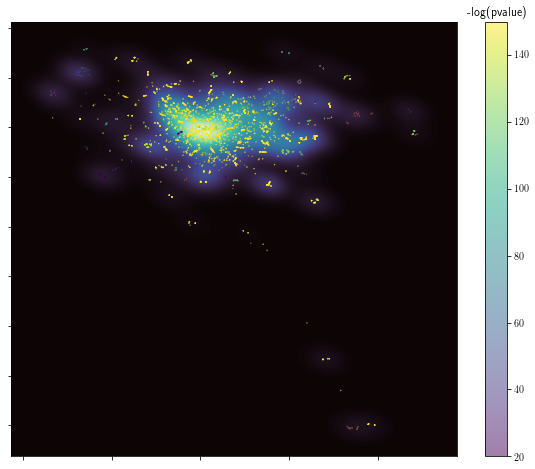

In [16]:
# Visualize metabolic network of compounds
fig, ax = plt.subplots(figsize=(10, 8))
networkplot(compound_info, ax)

Note that this visualization consists of over 5000 compounds that are all connected in a large collection of metabolic pathways.

# Validation with Fecal matter transplant trial

All of the datasets that we have analyzed so far are observational cohorts.
As Donald Rubin has said, "*No causation without manipulation!*". This means that with all of the cohort studies that we have investigated, we cannot make any strong claims about causal underpinnings.

However, with intervention studies, we can begin to make stronger claims underlying causality.  That being said, it is very important to note that causal inference on high dimensional data is still an active area of research and thus we did not attempt to perform a rigorious causal methodology.  Instead, we will compare our case-control results from the previous study to the [Kang et al 2017](https://microbiomejournal.biomedcentral.com/articles/10.1186/s40168-016-0225-7) fecal matter transplant study. Specifically, we compared the differential abundances obtained between time points to the case-control differentials obtained earlier to tentatively elucidate ‘directionality’ in any changes observed.

We focused on three sets of differential distributions, namely (1) case-control differentials, (2) timepoint differentials between weeks 0, 10, 18 and 100, and (3) donor–ASD subject differentials.

In [17]:
# Load the Kang et al fecal transplant data
# week0 vs control
week0_fname = f'{kang_directory}/week0/differentials-v2.nc'
kang0_diffs = extract_differentials(week0_fname)
week0_stats = ranking(kang0_diffs, reference_percentile=80)
# week0 vs donor
donor_fname = f'{kang_directory}/donor/differentials-v2.nc'
donor_diffs = extract_differentials(donor_fname)
donor_stats = ranking(donor_diffs, reference_percentile=80)
# week 0 vs week 10
fmt_fname = f'{kang_directory}/fmt10/differentials-v2.nc'
kang_0_10_diffs = extract_differentials(fmt_fname)
week_0_10_stats = ranking(kang_0_10_diffs, reference_percentile=80)
# week 0 vs week 18
fmt_fname = f'{kang_directory}/fmt18/differentials-v2.nc'
kang_0_18_diffs = extract_differentials(fmt_fname)
week_0_18_stats = ranking(kang_0_18_diffs, reference_percentile=80)
# week 0 vs week100
fmt_fname = f'{kang_directory}/fmt100/differentials-v2.nc'
kang_0_100_diffs = extract_differentials(fmt_fname)
week_0_100_stats = ranking(kang_0_100_diffs, reference_percentile=80)

The differentials are visualized below (log-fold change).

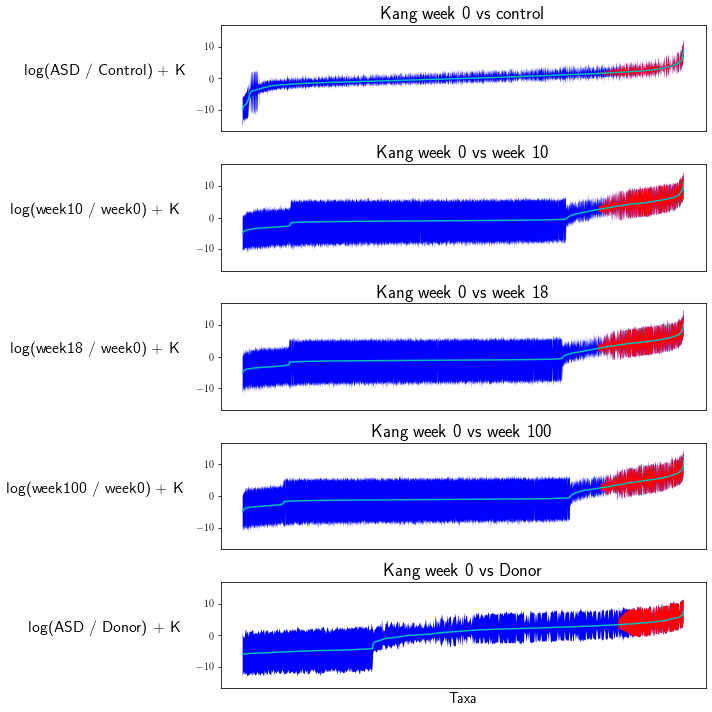

In [18]:
# Plot differentials
fig, ax = plt.subplots(5, 1, figsize=(10, 10), sharey=True)
rankplot(week0_stats, ax[0])
ax[0].set_title('Kang week 0 vs control', fontsize=18)
ax[0].set_xticks([])
ax[0].set_ylabel('log(ASD / Control) + K', fontsize=16, 
                 rotation=0, labelpad=90)
rankplot(week_0_10_stats, ax[1])
ax[1].set_title('Kang week 0 vs week 10', fontsize=18)
ax[1].set_ylabel('log(week10 / week0) + K', fontsize=16, 
                 rotation=0, labelpad=100)
ax[1].set_xticks([])
rankplot(week_0_18_stats, ax[2])
ax[2].set_title('Kang week 0 vs week 18', fontsize=18)
ax[2].set_ylabel('log(week18 / week0) + K', fontsize=16, 
                 rotation=0, labelpad=100)
ax[2].set_xticks([])
rankplot(week_0_100_stats, ax[3])
ax[3].set_title('Kang week 0 vs week 100', fontsize=18)
ax[3].set_ylabel('log(week100 / week0) + K', fontsize=16, 
                 rotation=0, labelpad=100)
ax[3].set_xticks([])

rankplot(donor_stats, ax[4])
ax[4].set_title('Kang week 0 vs Donor', fontsize=18)
ax[4].set_xticks([])
ax[4].set_ylabel('log(ASD / Donor) + K', fontsize=16, 
                 rotation=0, labelpad=90)
ax[4].set_xlabel('Taxa', fontsize=14)
plt.tight_layout()

Next, we will compare all of the differentials that we have computed.

To do this, we will leverage the [Isometric Log-ratio Transform](https://en.wikipedia.org/wiki/Compositional_data#Isometric_logratio_transform). This transformation provides two benefits, namely (1) it will allow us to project the data into an unconstrained Euclidean vector space, allowing us to make concrete statements about the directionality of change due to fecal transplant and (2) it will allow us to project all of the microbial abundances into a common coordinate system grounded by the phylogenetic tree.

We will perform the ILR transform on all of the differentials, then we will project these differentials onto a 2D representation to provide intuition about the directionality of these changes.

In [19]:
# Perform ILR transform
import qiime2
from skbio import TreeNode
tree_fname = f'{sepp_directory}/tree.qza'
tree = qiime2.Artifact.load(tree_fname).view(TreeNode)
tree = rename_clades(tree)
args = (kang0_diffs, kang_0_10_diffs, kang_0_18_diffs, kang_0_100_diffs, donor_diffs)
args = list(match_all_differentials(*args))

subtree = tree.shear(args[0].index)
res = list(ilr_transform_differentials(subtree, *args))
(kang_0_cc_ilr, kang_10_0_ilr, kang_18_0_ilr, kang_100_0_ilr, kang_donor_0_ilr) = res

# Compute projection using PCA
#X = np.hstack((kang_donor_ilr, 
#               kang_0_cc_ilr, 
#               kang_0_10_ilr, 
#               kang_0_18_ilr,
#               kang_0_100_ilr))
#V, prop_explained = create_projection(X.T, k=2)

In [20]:
# root all differentials around the control
M = 400
kang_donor_cc_ilr = kang_donor_0_ilr.iloc[:, :M] - kang_0_cc_ilr
kang_100_cc_ilr = kang_100_0_ilr.iloc[:, :M] - kang_0_cc_ilr
kang_18_cc_ilr = kang_18_0_ilr.iloc[:, :M] - kang_0_cc_ilr
kang_10_cc_ilr = kang_10_0_ilr.iloc[:, :M] - kang_0_cc_ilr
kang_0_cc_ilr = kang_0_cc_ilr

X = np.hstack((kang_donor_cc_ilr, 
               kang_100_cc_ilr, 
               kang_18_cc_ilr, 
               kang_10_cc_ilr,
               kang_0_cc_ilr))
V, prop_explained = create_projection(X.T, k=2)

Below is the 2D projection of the differentials.  The quivers represents the uncertainty in the directionality estimated from the data. 

Green denotes the differences between the ASD samples collected at week 0 compared to the donor samples given to those same children. The differentials marked in blue represent differences between age-sex matched ASD children and controls across all nine 16S datasets. The differentials highlighted in various shades of red represent differences of ASD children between week 0 and weeks 10, 18 and 100, respectively.

Text(0, 0.5, 'PC2 (19.29)%')

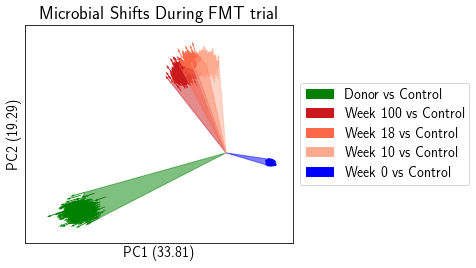

In [21]:
# Plot vector representations of differentials
#with plt.style.context('dark_background'):

fig, ax = plt.subplots()
cmap = plt.get_cmap('Reds')
vectorplot(kang_donor_cc_ilr, V, name='Donor vs Control', 
           color='g', alpha=0.5, scale=10, ax=ax)
vectorplot(kang_100_cc_ilr, V, name='Week 100 vs Control', 
           color=cmap(.75), alpha=0.5, scale=10, ax=ax)
vectorplot(kang_18_cc_ilr, V, name='Week 18 vs Control', 
           color=cmap(.5), alpha=0.5, scale=10, ax=ax)
vectorplot(kang_10_cc_ilr, V, name='Week 10 vs Control', 
           color=cmap(.3), alpha=0.5, scale=10, ax=ax)
vectorplot(kang_0_cc_ilr, V, name='Week 0 vs Control', 
           color='b', alpha=0.5, scale=10, ax=ax)


ax.set_xlim([-1.5e5, 0.5e5])
ax.set_ylim([-1.2e5, 1.7e5])

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
# Put a legend to the right of the current axis
# https://stackoverflow.com/a/4701285/1167475
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Microbial Shifts During FMT trial', fontsize=18)
ax.set_xlabel(f'PC1 ({np.round(prop_explained[0] * 100, 2)})%', fontsize=14)
ax.set_ylabel(f'PC2 ({np.round(prop_explained[1] * 100, 2)})%', fontsize=14)

There several takeaways here.  First the roughly 50% of the uncertainty in these differentials could be captured in the 2D projection below, suggesting that we can observe much of this uncertainty from this 2D plot alone.  

One can note that there is a strong perturbation after the FMT, the week 0 / Control differential is almost perpendicular to the week 10 / Control, week 18 / Control and week 100 / Control differentials.  Furthermore, the differentials after the FMT appear to be approaching the donor microbiomes.

We can then investigate KEGGs to understand what metabolic genes could be driving these axes of variation.

In [22]:
# Characterize PC axes based on KEGGs
Psi = sparse_balance_basis(subtree)[0]
clrV = pd.DataFrame(Psi.T @ V, index=args[0].index)
n = 50  # top 50 and bottom 50 microbes
pc1_neg = clrV.sort_values(0).head(n)
pc1_pos = clrV.sort_values(0).tail(n)
pc2_neg = clrV.sort_values(1).head(n)
pc2_pos = clrV.sort_values(1).tail(n)
ko_amp = pd.read_table(
    f'{amp_directory}/picrust2_out_pipeline/KO_predicted.tsv', index_col=0)
kegg_pc1_pos = ko_amp.align(pc1_pos, axis=0, join='inner')[0]
kegg_pc1_neg = ko_amp.align(pc1_neg, axis=0, join='inner')[0]
# apply binomial test.  Use BH correction to get per-gene pvalues
kegg_pc1_pos, kegg_pc1_neg = btest(kegg_pc1_pos, kegg_pc1_neg)
kegg_pc1_pos = log_pvalue(kegg_pc1_pos)
kegg_pc1_neg = log_pvalue(kegg_pc1_neg)
sig_pc1_neg = aggregate_pathways(
    pathway_name_file=f'{kegg_dir}/pathway_name.txt',
    pathway_to_ko_file=f'{kegg_dir}/pathway-to-ko.txt',
    features=kegg_pc1_neg)
# Perform binomial test on 16S data to determine uniquely identifying genes
ko_amp = pd.read_table(
    f'{amp_directory}/picrust2_out_pipeline/KO_predicted.tsv', index_col=0)
kegg_pc2_neg = ko_amp.align(pc2_neg, axis=0, join='inner')[0]
kegg_pc2_pos = ko_amp.align(pc2_pos, axis=0, join='inner')[0]
# apply binomial test.  Use BH to get per-gene pvalues
kegg_pc2_pos, kegg_pc2_neg = btest(kegg_pc2_pos, kegg_pc2_neg)
kegg_pc2_pos = log_pvalue(kegg_pc2_pos)
kegg_pc2_neg = log_pvalue(kegg_pc2_neg)
kegg_pc2_neg = kegg_pc2_neg.loc[kegg_pc2_neg['-log(pvalue)'] > 0]
sig_pc2_neg = aggregate_pathways(
    pathway_name_file=f'{kegg_dir}/pathway_name.txt',
    pathway_to_ko_file=f'{kegg_dir}/pathway-to-ko.txt',
    features=kegg_pc2_neg)
# Identify uniquely identifying KEGGs
pc1_unique_kegg = set(sig_pc1_neg['KEGG']) - set(sig_pc2_neg['KEGG'])
pc2_unique_kegg = set(sig_pc2_neg['KEGG']) - set(sig_pc1_neg['KEGG'])
idx1 = sig_pc1_neg['KEGG'].apply(lambda x: x in pc1_unique_kegg)
idx2 = sig_pc2_neg['KEGG'].apply(lambda x: x in pc2_unique_kegg)

We can then see what KEGGs uniquely drive PC1 and PC2.  After careful investigation,
it appears that while PC1 explains much of the variability in the differentials,
the microbes that explain these axes don't have uniquely identifying KEGGs.

However, if we investigate PC2, we do see a large number of uniquely identifying KEGGs.

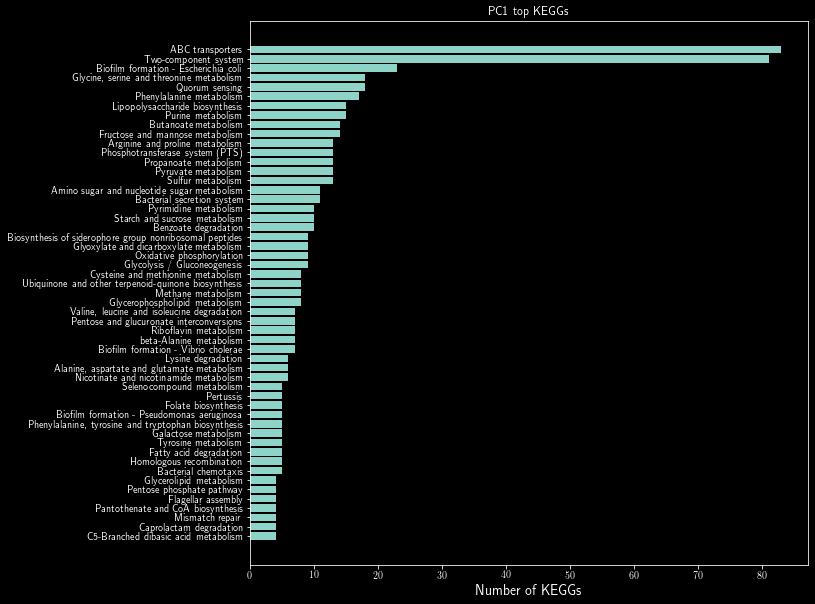

In [23]:
with plt.style.context('dark_background'):
    fig, ax = plt.subplots(figsize=(10, 10))
    pwy_counts = sig_pc1_neg.loc[idx1]['Name'].value_counts()
    pwy_counts = pwy_counts.loc[pwy_counts > 3] 
    pwy_counts = pwy_counts.sort_values(ascending=True)
    ax.barh(pwy_counts.index, pwy_counts.values)
    ax.set_xlabel('Number of KEGGs', fontsize=14)
    ax.set_title('PC1 top KEGGs')

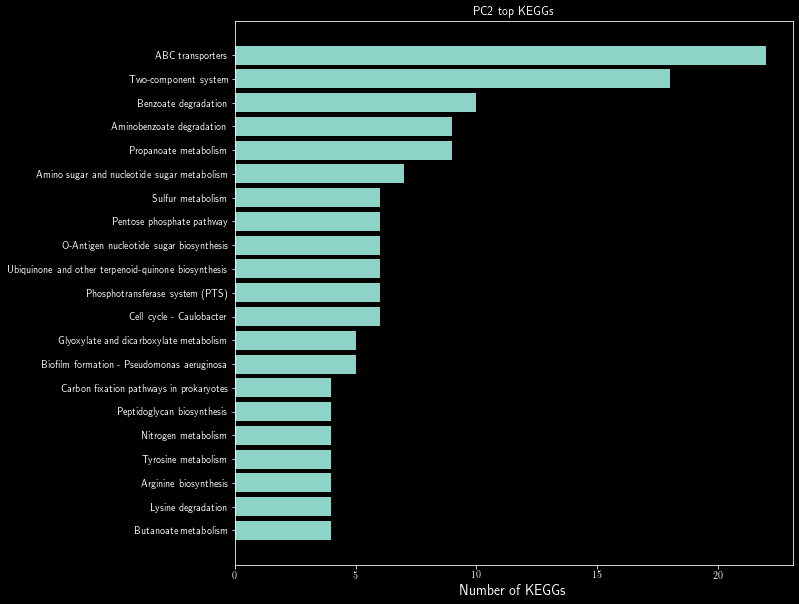

In [24]:
with plt.style.context('dark_background'):
    fig, ax = plt.subplots(figsize=(10, 10))
    pwy_counts = sig_pc2_neg.loc[idx2]['Name'].value_counts()
    pwy_counts = pwy_counts.loc[pwy_counts > 3] 
    pwy_counts = pwy_counts.sort_values(ascending=True)
    ax.barh(pwy_counts.index, pwy_counts.values)
    ax.set_xlabel('Number of KEGGs', fontsize=14)
    ax.set_title('PC2 top KEGGs')

We can see that there are genes involved in amino acid metabolism, sugar metabolism and microbial growth; all of these appear to be uniquely identifying he microbes that drive the variation along PC2.  This is highly consistent with the KEGGs that were highlighted in both the shotgun metagenomics and 16S amplicon analysis earlier.

# Closing comments

The results shown here strongly suggest that the differences in microbial composition between ASD subjects and their corresponding controls observed in a number of cross-sectional cohort studies over the past decade are real, consistent across studies, and significant. Our analysis further suggests that ASD-specific microbial perturbations translate into a broad spectrum of metabolic pathway perturbations, including core amino acid, carbohydrate and nucleotide metabolism and pathways associated with neurodegeneration and rapid microbial growth. The complex network of metabolic pathways potentially associated with ASD underscores why the discovery of causal mechanisms underlying ASD remains so elusive.

Our multi-omic analysis has further shown that similar convergent ASD-specific perturbations could also be observed at the human transcription level, albeit with an effect size about two-three orders of magnitude smaller than the effect size accompanying the observed microbial perturbations.

Importantly, and while our analysis suggests that following FMT treatment relative microbial abundances in the ASD cohort nudged toward those of the control participants and were consistent with reported phenotype changes, no definitive causal inferences could be drawn from the analysis due to limitations with the original study design.

## Future potential opportunities for investigation

While the present analysis for the first time shows that there is a strong association between the microbiome and ASD that is consistent across studies and converges toward a common metabolic blueprint, whether this association supports a causal role for the microbiome remains unanswered.

The results however point toward a number of concrete next steps that the field could capitalize on rather than recreate in order to advance our insights into the possible role of the microbiome in ASD.

### Longitudinal, interventional trials
The integrated analytical pipeline we present here unequivocally shows that the association between the microbiome and ASD is real and consistent across geographically disparate cohorts, but it also underscores the impossibility of gaining causal insights without an interventional approach that affords longitudinal observation of the effect of experimental perturbations. The FMT study we used to validate our cross-sectional study illustrates how such studies can contribute to a better understanding of the causal role the microbiome might play in ASD.

### Dense longitudinal analysis

In the studies we analyzed here longitudinal sampling was extremely rare, and if longitudinal data had been collected, they had been collected over the span of weeks or months.  However, we know that dietary perturbations happen on the scale of days. Furthermore given the high comorbidity rate of ASD with gastrointestinal diseases (see [here](https://onlinelibrary.wiley.com/doi/full/10.1111/j.1744-6155.2010.00244.x?casa_token=srgtg13WAPgAAAAA%3Ac3WMdTgvZm1u_CZpip2ZtpN_DIc3b03XDAjm_7LW7_KF-ORel0PEHDd8dIKUFGP9PycUjZVoy_8lXTc) and [here](https://link.springer.com/content/pdf/10.1016%2Fj.nurt.2010.06.001.pdf)), daily time series sampling during GI symptom flare ups could present future opportunities towards understanding host-microbe-immune interactions during these settings. At this point in time, we have not seen any ASD studies that have obtained daily sampling protocols for ASD children.

### Integrated multi-omics analysis

As shown in this study, using a standardized approach to integrate biological information codified by different omics levels can provide a convergent picture of the layers of networks contributing to our metabolism in the context of disease. Only partial integration has been achieved in the ASD field, clearly highlighting the need for more targeted efforts in this direction. The critical question remains how many omics levels and which ones. [Previous studies](https://www.nature.com/articles/s41592-019-0616-3) have shown that it is possible to link microbes to metabolites if paired microbe-metabolite data are collected—for this study, we were not able to access any published datasets containing paired microbe-metabolite data or that reported paired microbe-human genotype data.

### Host-microbe-diet interactions

A critical aspect missing from most studies relates to the role of diet both vis-a-vis ASD but also microbiome composition. Unraveling the causal connection between diet and host-microbiome interactions will be critical to understanding the causal contribution of each of these elements to ASD. The diet of ASD children is often very limited, making it even more necessary to determine the directionality of any causal link between the two.

# Appendix

## Statistical overview

### Differential Ranking

The common goal of perform differential abundance is to try to identify which features have "changed" across the experimental conditions.  In my field, we are often trying to identify microbes or genes that have "changed" in abundance to determine if microbes have grown or declined across conditions.  When we mean by "changed", we are
interested in determine if the fold change across conditions is equal to one or not, in particular, $$\frac{A_i}{B_i} = 1$$ for abundances in conditions $A$ and $B$ for a given feature $i$.

We have liberally highlighted the term "change", because this notion is no longer fully observed, if we only observe data of proportions.  For the reason being that we are missing a key variable of interest, the total number of individuals in each experimental condition. 

Specifically, if we cannot directly observe $A_i$ or $B_i$, but can observe their proportions $p_{A_i}$, $p_{B_i}$ we can no longer make concrete statements about "change" because we can't observe the total number of individuals $N_A$ and $N_B$.  In particular, we have a bias term $\frac{N_A}{N_B}$ given by

$$\frac{A_i}{B_i} = \frac{N_A p_{A_i}}{N_B p_{B_i}} = \frac{N_A}{N_B} \times \frac{p_{A_i}}{p_{B_i}}$$

As a result, any statement of change that we make will be confounded by the change in $N$. 
To see a concrete example, see [Figure 1 and 2 in this paper](https://www.nature.com/articles/s41467-019-10656-5).

There are two ways to detail with this, namely computing ratios or rankings.
Ratios are appealing since they are scale-invariant, namely the dependence on the total microbial load will be dropped.   Specifically, if we consider two features $i$ and $j$ and compute their ratio, the following holds

$$
\frac{p_{A_i} / p_{A_j}}{p_{B_i} / p_{B_j}} = \frac{A_i / A_j}{B_i / B_j}
$$

The other approach, ranking, takes an approach that is closer to traditional differential abundance tools such as edgeR, DEseq2 and aldex2.

The microbial load bias will impact every species equally, meaning that if we can ***ignore*** this bias, this approach would be scale-invariant as well.  We can do this by merely focusing on the ordering of the log-fold changes rather than log-fold change values themselves.

$$rank\bigg(\frac{A_i}{B_i}\bigg) = rank\bigg(\frac{N_A}{N_B} \times \frac{p_{A_i}}{p_{B_i}}\bigg) = rank\bigg(\frac{p_{A_i}}{p_{B_i}}\bigg)$$

In a practical way, what this is saying is that if we don't have the absolute abundances, we can't say for certain what exactly is changing -- the best that we can do is sort the microbes by their log-fold changes and prioritize them accordingly.  This also has a number of disturbing implications for standard differential abundance statistical testing (a discussion topic for another time).

### A Brief Primer to Bayesian Inference

What is Bayesian inference exactly, and how does it differ from Frequentist inference?
Mathematically, there isn't actually a difference between the two frameworks, but there are philosophical differences.  The big assumption boils down to how uncertainty should be modeled. Namely

- Frequentist approaches assume there is no uncertainty in the underlying system. Namely all model parameters have an exact ground truth, and can be perfectly estimated if infinitely number of samples can be collected.
- Bayesian approaches assume uncertainty in the underlying system due to measurement error.  Because we can not exactly measure systems (i.e. sampling error, calibration error), we can never perfectly estimate the model parameters - the best we can do is get a reasonable ballpark estimate by explicitly modeling the uncertainty.

Ok, that's the philosophy, but how can these contradictory ideas exist in the same mathematical framework.  Everything boils down to Bayes theorem

$$ P(state | data) = P(data | state) \; P(state) $$

We're denoting "state" as the underlying model parameters (i.e. log fold change) that we want to estimate. $P(data | state)$ denotes the data likelihood, the probability of observing the data given a specific "state". $P(state)$ denotes the prior probability of the state, the observes best guess what the state could be.  $P(state | data)$ denotes the probability of observing a state given the data. This entire process is known as a Bayesian update, given a prior belief of the system and observational data, the model parameter along with their corresponding uncertainties are updated accordingly.

The only mathematical difference boils down to the choice of prior.  Frequentist approaches assume that we do not know anything about the system, and thus assume a *flat prior*.  Unfortunately, this approach is simply not practical for biological problems where the sheer number of resources (i.e. size of biological datasets) required to accurately fit these models would be astronomical.  Biological systems are extremely high dimensional and often sparse, consisting of thousands of dimensions, where 90% of the matrix entries aren't observed. To make frequentist inference tractable, many practioners will make assumptions such as sparsity (which is borrowed from the Bayesian literature).  Whether or not these assumptions hold is another question. 

Bayesian approaches offers several appealing properties, namely 
- Good choices of priors can make models tractable. For example, our differential abundance model would run into singularities otherwise (i.e. log(0) -> negative infinity). 
- More complex models can be built.  For instance, we can model overdispersion in both case and control samples in a Bayesian framework.
- Measurement error can be explicitly modeled.  For instance, we can model the microbial and RNAseq read counts using a Negative Binomial distribution.
- More flexible hypothesis testing.  Once we have an estimate of the posterior distribution, we can draw MCMC samples from it, giving us the flexibility to design customized statistical tests. 

The choice of prior can be important, poor choices of priors do reflect poor assumptions that can lead to biased estimates. For model parameters that are poorly understood, we recommend sticking with uninformed priors that reflect some of the frequentist philosophy. However, many of the parameters of interest can have well-defined priors.  For instance, on average, 16S samples only consist of 10k reads --  The dynamic range of these measurements can provide a rough bound for log-fold change estimates that we can estimate (i.e. we shouldn't expect to see log-fold change estimates much larger than log(10000)).

It is important to notet at hypothesis testing in a Bayesian framework has a fundamentally different interpretation to the Frequentist approach.  Rather than testing if we can reject the null hypothesis, the Bayesian approach is to quantify properties of the posterior distribution.  For instance, we can test to see if the posterior distribution overlaps with zero to determine if there is a significant difference or not.  The next section  

### Bayesian Hypothesis testing

When we build these Bayesian models, we can model the uncertainty through MCMC samples from the posterior distribution.  Namely, if we have a posterior distribution $P(state | data) $ estimated and we want to make statements regarding what values the state likely has, we can investigate sample drawn from the distribution, such as computing averages or standard deviations.  If we wanted to compute an average, we know that it it will follow the following approximation.

$$ 
\mathbb{E}[x] \approx \frac{1}{N} \sum\limits_{i=0}^N x_i \quad x_i \sim P(state | data)  
$$

This is a classic demonstration of Monte Carlo sampling, if you draw $N$ samples of $x_i$ from the posterior distribution $P(state|data)$, you approximate the true mean of the posterior distribution.  The same approach applies for calculating standard deviations and other quantities.  We used a very similar approach to compute the differential abundance tests and effect size tests.

### Bayesian Effect Size Calculations

The spherical tests for estimating effect size is slightly more involved.
This is a completely customized approach to provide a quick approximation to MANOVA for ultra-high dimensional data. It may not be as sensitive as traditional multivariate tests (i.e. it won't detect correlations), but it is much faster and has virtually no false positives. The idea is that given $N$ samples from the posterior distribution, the smallest sphere that encapsulates these points is constructed.  Then it will test to see if the zero point is in the posterior distribution.

Remember how I said that we don't know where zero is due to the total abundances? Well, this is a different zero -- the zero we're talking about here is obtained after performing a log-ratio transformation.  In this case, if zero is contained within the sphere, it means that all of the log-fold change estimates are equal and that there isn't a clear cut difference. 

Here is a mind experiment.  Imagine that we have 10 microbes, all with proportions 1/10. If we apply an experimental perturbation and observe one microbe has proportions 1/2 while all of the other microbes have proportions 1/18, we may not be able to know exactly which microbes changed (i.e. did one microbe increase, did all of the others dropped, ...), but we can ***definitely*** say that at least one of the microbes changed.

But let's rewind, if we *don't* see a change, does that mean that isn't actually a change? Absolutely not.  It could be that ***all*** of the microbes increased or decreased in the exact amount, but because we don't have absolute abundances, we can't tell the difference.

So in essence, if we don't have absolute data, but we have rock solid Bayesian approaches, we won't get false positives, but there is still a chance we will have false negatives.  In other words, if our spherical test, or any test fails, it doesn't mean that there isn't a difference; but our spherical test should never give false positives unless the model is poorly calibrated.

## Datasets analyzed

### 16S amplicon datasets

- Dan et al. Altered gut microbial profile is associated with abnormal metabolism activity of Autism Spectrum Disorder. Gut Microbes
- Berding K et al. Dietary Patterns Impact Temporal Dynamics of Fecal Microbiota Composition in Children With Autism Spectrum Disorder. Front Nutr.
- Zou R et al. Changes in the Gut Microbiota of Children with Autism Spectrum Disorder. Autism Res.
- Fouquier J, et al. The Gut Microbiome in Autism: Study-Site Effects and Longitudinal Analysis of Behavior Change. mSystems
- Zurita MF et al. Analysis of gut microbiome, nutrition and immune status in autism spectrum disorder: a case-control study in Ecuador. Gut Microbes
- Kang et al. Long-term benefit of Microbiota Transfer Therapy on autism symptoms and gut microbiota. Sci Rep
- Chen et al Gut Bacteria Shared by Children and Their Mothers Associate with Developmental Level and Social Deficits in Autism Spectrum Disorder. mSphere
- Massachusetts General Hospital (Fasano 2020 )
- Massachusetts General Hospital (Cao 2021)


### Shotgun metagenomic datasets
- Averina et al. The bacterial neurometabolic signature of the gut microbiota of young children with autism spectrum disorders. J Med Microbiol.
- Dan et al. Altered gut microbial profile is associated with abnormal metabolism activity of Autism Spectrum Disorder. Gut Microbes
- Wang et al. Alterations in Gut Glutamate Metabolism Associated with Changes in Gut Microbiota Composition in Children with Autism Spectrum Disorder. mSystems.
- McDonald (in progress)


### RNAseq datasets
- [SRP072713](https://www.ncbi.nlm.nih.gov/sra/SRP072713)
- [SRP115571](https://www.ncbi.nlm.nih.gov/sra/SRP115571)
- [SRP132816](https://www.ncbi.nlm.nih.gov/sra/SRP132816)
- [SRP190888](https://www.ncbi.nlm.nih.gov/sra/SRP190888)

## Bioinformatics Overview

### 16S amplicon datasets

We used a script that wrapped [Deblur](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5340863/) to download studies from the Sequence Read Archive (SRA) and remove sequencing reads that arose due to sequencing error.  The remaining reads are then used to serve as OTUs.

For the microbial genome prediction, we used [Picrust](https://www.nature.com/articles/s41587-020-0548-6) to perform ancestral state reconstruction to link microbial reads to KEGG annotations.

### Shotgun metagenomics

We used Bowtie2 to map microbial reads to the [Web of Life](https://www.biorxiv.org/content/10.1101/2021.04.04.438427v1), a database of 10,000 phylogenetically diverse microbial genomes. [Woltka](https://github.com/qiyunzhu/woltka) is then used to link microbial reads to KEGG annotations.

### RNA sequencing data

All RNAseq datasets were directly accessed from [Recount3](https://www.biorxiv.org/content/10.1101/2021.05.21.445138v1), where RNAseq datasets are already preprocessed.